In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load the Dataset

In [47]:
testData = pd.read_csv('../data/test.csv')
trainData = pd.read_csv('../data/train.csv')
storeData = pd.read_csv('../data/store.csv')    
sampleData = pd.read_csv('../data/sample_submission.csv')


C:\Users\hp\AppData\Local\Temp\ipykernel_11188\2669231463.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  trainData = pd.read_csv('../data/train.csv')


In [48]:
# Display the shape (number of rows and columns) of the sampleData and testData DataFrames
sampleData.shape
testData.shape

(41088, 8)

# EDA

Data Summarization

In [50]:
def basic_info(data):
    """
    Prints basic information about the DataFrame including:
    - Data types and non-null counts
    - Descriptive statistics for all columns
    - Count of missing values for each column
    """
    # Print data types and non-null counts
    print('Data types and non-null counts')
    print(data.info())
    
    # Print descriptive statistics for all columns
    print('Descriptive statistics')
    print(data.describe(include='all'))
    
    # Print count of missing values for each column
    print('Count of missing values')
    print(data.isnull().sum())

In [51]:
def specific_summarizations(data):
    nums_records = data.shape[0]
    num_unique_values = data.nunique()

    print('Number of records:', nums_records)
    print(f'Number of unique values:\n{num_unique_values}')

    for column in data.columns:
        if data[column].dtype == 'object':
            print(f'\nTop 5 most frequent values in column "{column}":')
            print(data[column].value_counts().head())
        elif data[column].dtype in ['int64', 'float64']:
                total = data[column].sum()
                mean = data[column].mean()
                print(f'\nTotal of column "{column}": {total}')
                print(f'Mean of column "{column}": {mean:.2f}')

                if pd.to_datetime(data[column], errors='coerce').notnull().all():
                    data[column] = pd.to_datetime(data[column])
                    messages_per_period = data[column].dt.to_period('M').value_counts().sort_index()
                    print(f'\nNumber of records per month for column "{column}":')
                    print(messages_per_period) 

    numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
    if not numeric_columns.empty:
        top_messages = data.nlargest(5, numeric_columns[0])
        print(f'\nTop 5 records with the highest value in column "{numeric_columns[0]}":')
    else:
        print('No numerical columns to display top records.')     

In [52]:
def summarize_data(data):
    print("Basic Information:")
    basic_info(data)
    print("\nSpecific Summarizations:")
    specific_summarizations(data)

In [53]:
# Summary of Train Data
summarize_data(trainData)

Basic Information:
Data types and non-null counts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None
Descriptive statistics
               Store     DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1.017209e+06     1017209  1.017209e+06  1.017209e+06   
unique           NaN           NaN         942           NaN           NaN   
top              NaN          

In [54]:
trainData.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
178937,1970-01-01 00:00:00.000000538,1970-01-01 00:00:00.000000006,2015-02-21,1970-01-01 00:00:00.000002171,1970-01-01 00:00:00.000000335,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000000,0,1970-01-01
882169,1970-01-01 00:00:00.000000990,1970-01-01 00:00:00.000000004,2013-05-02,1970-01-01 00:00:00.000007860,1970-01-01 00:00:00.000000718,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,0,1970-01-01
437543,1970-01-01 00:00:00.000000134,1970-01-01 00:00:00.000000003,2014-06-04,1970-01-01 00:00:00.000005972,1970-01-01 00:00:00.000000570,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,0,1970-01-01
63248,1970-01-01 00:00:00.000000809,1970-01-01 00:00:00.000000005,2015-06-05,1970-01-01 00:00:00.000012611,1970-01-01 00:00:00.000001023,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,0,1970-01-01
393346,1970-01-01 00:00:00.000000982,1970-01-01 00:00:00.000000004,2014-07-17,1970-01-01 00:00:00.000008787,1970-01-01 00:00:00.000000743,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,0,1970-01-01


In [55]:
# Summary of test Data
summarize_data(testData)

Basic Information:
Data types and non-null counts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB
None
Descriptive statistics
                  Id         Store     DayOfWeek        Date          Open  \
count   41088.000000  41088.000000  41088.000000       41088  41077.000000   
unique           NaN           NaN           NaN          48           NaN   
top              NaN           NaN           NaN  2015-09-17           NaN   


In [56]:
# The data summary above shows that we have 11 missing data on open and since open is catagorical we impute it uwing mode
mode = testData['Open'].mode()[0]
testData['Open'].fillna(mode, inplace = True)
testData.isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_11188\4125890122.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  testData['Open'].fillna(mode, inplace = True)


Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [57]:
# summary of store data
summarize_data(storeData)

Basic Information:
Data types and non-null counts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None
Descriptive statistics
             Store StoreType Assortment  CompetitionDistance  \
count   1115.000

In [58]:
# The columns 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval' have 544 missing values out of a total of 571, so we should drop these columns

storeData.drop(columns=['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], inplace=True)

In [59]:
storeData.sample(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
4,1970-01-01 00:00:00.000000005,a,a,29910.0,4.0,2015.0,1970-01-01 00:00:00.000000000
357,1970-01-01 00:00:00.000000358,a,a,2890.0,10.0,2003.0,1970-01-01 00:00:00.000000000
929,1970-01-01 00:00:00.000000930,a,a,70.0,NaN,NaN,1970-01-01 00:00:00.000000000
943,1970-01-01 00:00:00.000000944,c,a,1670.0,7.0,2015.0,1970-01-01 00:00:00.000000000
140,1970-01-01 00:00:00.000000141,c,c,1540.0,NaN,NaN,1970-01-01 00:00:00.000000001


In [61]:
# Since the columns 'CompetitionOpenSinceMonth', 'CompetitionDistance', and 'CompetitionOpenSinceYear' have less than half missing data, we impute them
mode = storeData['CompetitionOpenSinceMonth'].mode()[0]
storeData['CompetitionOpenSinceMonth'].fillna(mode, inplace=True)
median = storeData['CompetitionOpenSinceYear'].median()
storeData['CompetitionOpenSinceYear'].fillna(median, inplace=True)
median = storeData['CompetitionDistance'].median()
storeData['CompetitionDistance'].fillna(median, inplace=True)
storeData.isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_11188\3835176209.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  storeData['CompetitionOpenSinceMonth'].fillna(mode, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_11188\3835176209.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

In [62]:
# Summary of sample data
summarize_data(sampleData)

Basic Information:
Data types and non-null counts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB
None
Descriptive statistics
                 Id    Sales
count  41088.000000  41088.0
mean   20544.500000      0.0
std    11861.228267      0.0
min        1.000000      0.0
25%    10272.750000      0.0
50%    20544.500000      0.0
75%    30816.250000      0.0
max    41088.000000      0.0
Count of missing values
Id       0
Sales    0
dtype: int64

Specific Summarizations:
Number of records: 41088
Number of unique values:
Id       41088
Sales        1
dtype: int64

Total of column "Id": 844132416
Mean of column "Id": 20544.50

Number of records per month for column "Id":
Id
1970-01    41088
Freq: M, Name: count, dtype: int64

Total of column "Sales": 0
Mea

Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

Train Data Promo Counts:
Promo
1970-01-01 00:00:00.000000000    629129
1970-01-01 00:00:00.000000001    388080
Name: count, dtype: int64

Test Data Promo Counts:
Promo
1970-01-01 00:00:00.000000000    24824
1970-01-01 00:00:00.000000001    16264
Name: count, dtype: int64

Train Data Promo Distribution:
Promo
1970-01-01 00:00:00.000000000    0.618485
1970-01-01 00:00:00.000000001    0.381515
Name: count, dtype: float64

Test Data Promo Distribution:
Promo
1970-01-01 00:00:00.000000000    0.604167
1970-01-01 00:00:00.000000001    0.395833
Name: count, dtype: float64


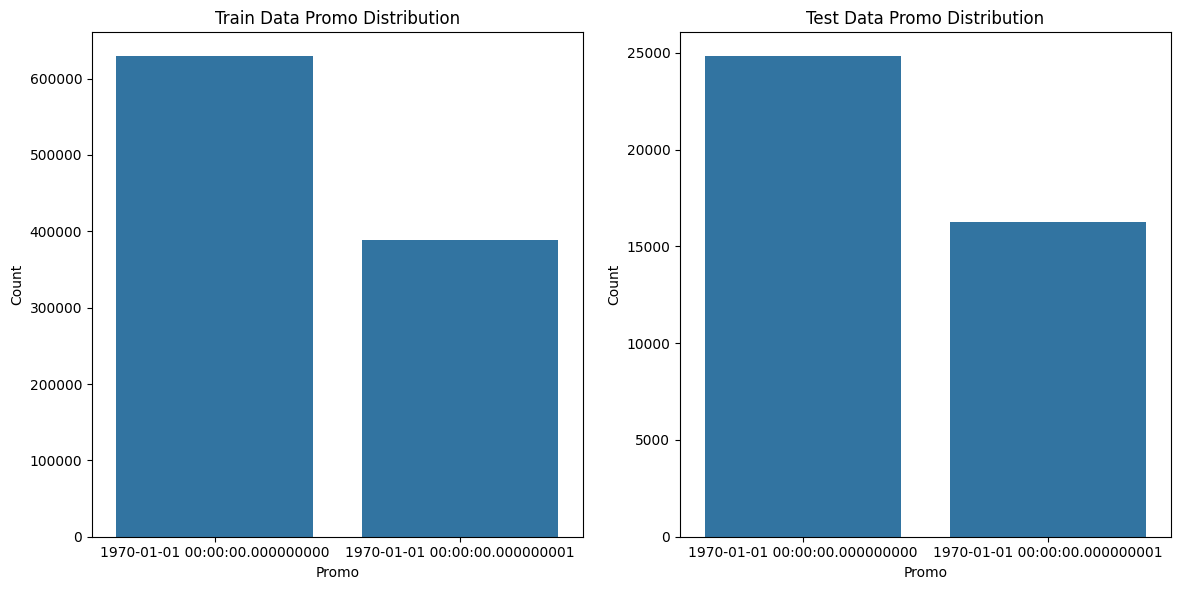


Chi-Square Test Results:
Chi2 Statistic: 34.23585205719095
P-value: 4.882118480134891e-09
The distributions of the 'promo' column in the train and test datasets are significantly different.


In [70]:
from scipy.stats import chi2_contingency

# 1. Check value counts
train_promo_counts = trainData['Promo'].value_counts()
test_promo_counts = testData['Promo'].value_counts()

print("Train Data Promo Counts:")
print(train_promo_counts)
print("\nTest Data Promo Counts:")
print(test_promo_counts)

# Normalize the counts to compare distributions
train_promo_dist = train_promo_counts / train_promo_counts.sum()
test_promo_dist = test_promo_counts / test_promo_counts.sum()

print("\nTrain Data Promo Distribution:")
print(train_promo_dist)
print("\nTest Data Promo Distribution:")
print(test_promo_dist)

# 2. Visualize the distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=train_promo_counts.index, y=train_promo_counts.values, ax=ax[0])
ax[0].set_title('Train Data Promo Distribution')
ax[0].set_xlabel('Promo')
ax[0].set_ylabel('Count')

sns.barplot(x=test_promo_counts.index, y=test_promo_counts.values, ax=ax[1])
ax[1].set_title('Test Data Promo Distribution')
ax[1].set_xlabel('Promo')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# 3. Perform a chi-square test
# Create a contingency table
contingency_table = pd.concat([train_promo_counts, test_promo_counts], axis=1)
contingency_table.columns = ['train', 'test']
contingency_table.fillna(0, inplace=True)

chi2, p, dof, ex = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("The distributions of the 'promo' column in the train and test datasets are significantly different.")
else:
    print("The distributions of the 'promo' column in the train and test datasets are not significantly different.")


Check & compare sales behavior before, during, and after holidays

In [71]:
# Convert Date column in train datasets to datetime
trainData['Date'] = pd.to_datetime(trainData['Date'])
# Add a Holiday column to the train dataset by indicating if it is either a state or school holiday

trainData['Holiday'] = trainData.apply(lambda row: row['StateHoliday'] != '0' or row['SchoolHoliday'] == 1, axis=1)

# sort the data by date
trainData.sort_values('Date', inplace=True) 

In [72]:
# Add a 'HolidayType' column to specify the type of state holiday
trainData['HolidayType'] = trainData['StateHoliday'].map({'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas', '0': 'None'})
trainData.loc[trainData['SchoolHoliday'] == 1, 'HolidayType'] = 'School Holiday'

# Sort by Date
trainData.sort_values(by='Date', inplace=True)

Define periods: before, during, and after holidays
Here we assume 'before' is 1 day before, 'during' is the day of the holiday, and 'after' is 1 day after
This is an example and can be adjusted according to the actual analysis requirement


In [73]:
trainData['Period'] = 'Regular'
trainData.loc[trainData['Holiday'], 'Period'] = 'During Holiday'
trainData.loc[trainData['Date'].shift(-1).isin(trainData.loc[trainData['Holiday'], 'Date']), 'Period'] = 'Before Holiday'
trainData.loc[trainData['Date'].shift(1).isin(trainData.loc[trainData['Holiday'], 'Date']), 'Period'] = 'After Holiday'

# Check the Period assignment
print(trainData[['Date', 'StateHoliday', 'SchoolHoliday', 'Holiday', 'HolidayType', 'Period']])

# Calculate average sales in each period
average_sales = trainData.groupby('Period')['Sales'].mean().reset_index()

print("\nAverage Sales by Period:")
print(average_sales)

              Date StateHoliday                 SchoolHoliday  Holiday  \
1017208 2013-01-01            a 1970-01-01 00:00:00.000000001     True   
1017205 2013-01-01            a 1970-01-01 00:00:00.000000001     True   
1017204 2013-01-01            a 1970-01-01 00:00:00.000000001     True   
1017203 2013-01-01            a 1970-01-01 00:00:00.000000001     True   
1017202 2013-01-01            a 1970-01-01 00:00:00.000000001     True   
...            ...          ...                           ...      ...   
5       2015-07-31            0 1970-01-01 00:00:00.000000001    False   
4       2015-07-31            0 1970-01-01 00:00:00.000000001    False   
3       2015-07-31            0 1970-01-01 00:00:00.000000001    False   
9       2015-07-31            0 1970-01-01 00:00:00.000000001    False   
0       2015-07-31            0 1970-01-01 00:00:00.000000001    False   

            HolidayType          Period  
1017208  Public Holiday  Before Holiday  
1017205  Public Holiday   A

Visualize a sales behavior

C:\Users\hp\AppData\Local\Temp\ipykernel_11188\1538233332.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Period', y='Sales', data=trainData, estimator=sum, ci=None)


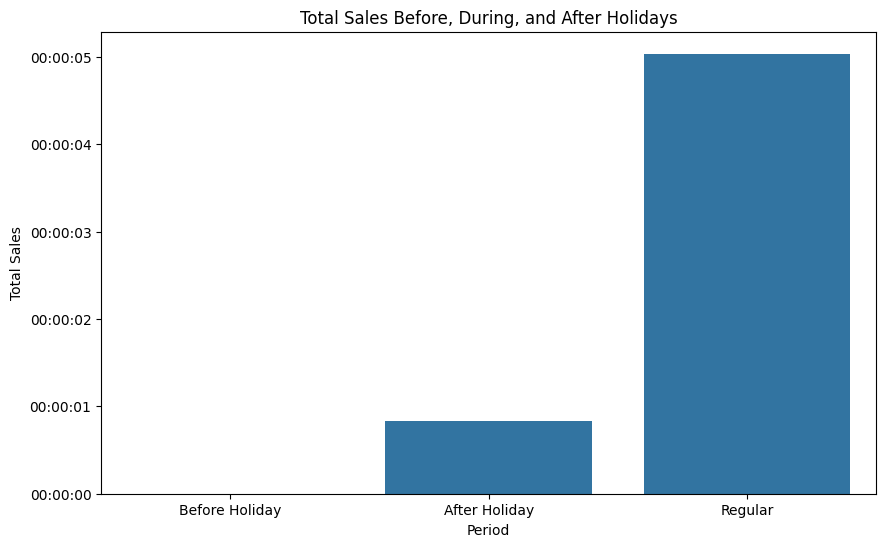

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Period', y='Sales', data=trainData, estimator=sum, ci=None)
plt.title('Total Sales Before, During, and After Holidays')
plt.xlabel('Period')
plt.ylabel('Total Sales')
plt.show()

3. Find out any seasonal (Christmas, Easter, etc) purchase behaviors

In [75]:
# Add a 'HolidayType' column to specify the type of state holiday
trainData['HolidayType'] = trainData['StateHoliday'].map({'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas', '0': 'None'})
trainData.loc[trainData['SchoolHoliday'] == 1, 'HolidayType'] = 'School Holiday'

# Sort by Date
trainData.sort_values(by='Date', inplace=True)

# Define periods for Christmas and Easter
trainData['Period'] = 'Regular'
# During Christmas and Easter
trainData.loc[trainData['StateHoliday'] == 'c', 'Period'] = 'During Christmas'
trainData.loc[trainData['StateHoliday'] == 'b', 'Period'] = 'During Easter'
# Before Christmas and Easter
trainData.loc[trainData['Date'].shift(-1).isin(trainData.loc[trainData['StateHoliday'] == 'c', 'Date']), 'Period'] = 'Before Christmas'
trainData.loc[trainData['Date'].shift(-1).isin(trainData.loc[trainData['StateHoliday'] == 'b', 'Date']), 'Period'] = 'Before Easter'
# After Christmas and Easter
trainData.loc[trainData['Date'].shift(1).isin(trainData.loc[trainData['StateHoliday'] == 'c', 'Date']), 'Period'] = 'After Christmas'
trainData.loc[trainData['Date'].shift(1).isin(trainData.loc[trainData['StateHoliday'] == 'b', 'Date']), 'Period'] = 'After Easter'

# Check the Period assignment
print(trainData[['Date', 'StateHoliday', 'HolidayType', 'Period']])

# Calculate average sales in each period
average_sales = trainData.groupby('Period')['Sales'].mean().reset_index()

print("\nAverage Sales by Period:")
print(average_sales)

              Date StateHoliday     HolidayType   Period
1017208 2013-01-01            a  Public Holiday  Regular
1016473 2013-01-01            a  Public Holiday  Regular
1016472 2013-01-01            a  Public Holiday  Regular
1016471 2013-01-01            a  Public Holiday  Regular
1016470 2013-01-01            a  Public Holiday  Regular
...            ...          ...             ...      ...
743     2015-07-31            0            None  Regular
744     2015-07-31            0            None  Regular
745     2015-07-31            0            None  Regular
739     2015-07-31            0            None  Regular
0       2015-07-31            0            None  Regular

[1017209 rows x 4 columns]

Average Sales by Period:
             Period                         Sales
0   After Christmas 1970-01-01 00:00:00.000000172
1      After Easter 1970-01-01 00:00:00.000000222
2  Before Christmas 1970-01-01 00:00:00.000003065
3     Before Easter 1970-01-01 00:00:00.000001945
4           

Visualization

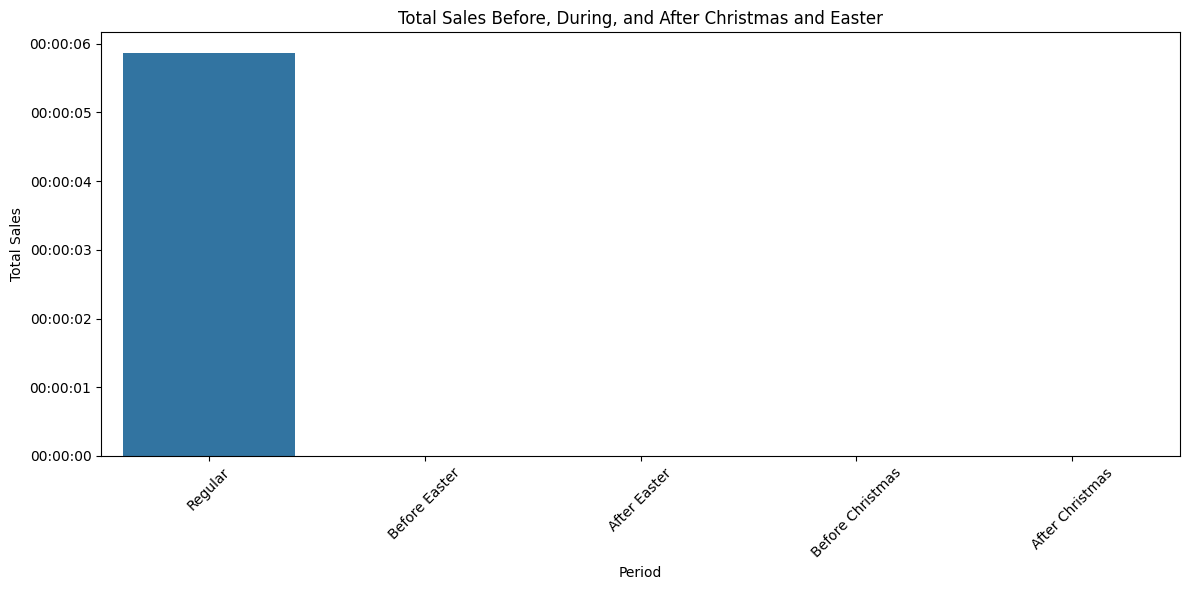

In [76]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Period', y='Sales', data=trainData, estimator=sum, errorbar=None)
plt.title('Total Sales Before, During, and After Christmas and Easter')
plt.xlabel('Period')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. What can you say about the correlation between sales and the number of customers?

In [77]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 1017208 to 0
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  datetime64[ns]
 1   DayOfWeek      1017209 non-null  datetime64[ns]
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  datetime64[ns]
 4   Customers      1017209 non-null  datetime64[ns]
 5   Open           1017209 non-null  datetime64[ns]
 6   Promo          1017209 non-null  datetime64[ns]
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  datetime64[ns]
 9   Holiday        1017209 non-null  bool          
 10  Period         1017209 non-null  object        
 11  HolidayType    886137 non-null   object        
dtypes: bool(1), datetime64[ns](8), object(3)
memory usage: 94.1+ MB


In [78]:
# Convert 'Sales' and 'Customers' columns to numerical type
trainData['Sales'] = pd.to_numeric(trainData['Sales'])
trainData['Customers'] = pd.to_numeric(trainData['Customers'])

# Calculate the Pearson correlation coefficient between 'Sales' and 'Customers'
correlation = trainData['Sales'].corr(trainData['Customers'])

print("Correlation between Sales and Customers:", correlation)

Correlation between Sales and Customers: 0.894710773301705


5. How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [79]:
# Group the data by promotion status
promo_groups = trainData.groupby('Promo')

# Calculate average sales and average number of customers for each group
avg_sales = promo_groups['Sales'].mean()
avg_customers = promo_groups['Customers'].mean()

print("Average Sales with and without Promotions:")
print(avg_sales)
print("\nAverage Customers with and without Promotions:")
print(avg_customers)

# Calculate average sales per customer for each group
avg_sales_per_customer = avg_sales / avg_customers

print("\nAverage Sales per Customer with and without Promotions:")
print(avg_sales_per_customer)

Average Sales with and without Promotions:
Promo
1970-01-01 00:00:00.000000000    4406.050805
1970-01-01 00:00:00.000000001    7991.152046
Name: Sales, dtype: float64

Average Customers with and without Promotions:
Promo
1970-01-01 00:00:00.000000000    517.823542
1970-01-01 00:00:00.000000001    820.098815
Name: Customers, dtype: float64

Average Sales per Customer with and without Promotions:
Promo
1970-01-01 00:00:00.000000000    8.508788
1970-01-01 00:00:00.000000001    9.744133
dtype: float64


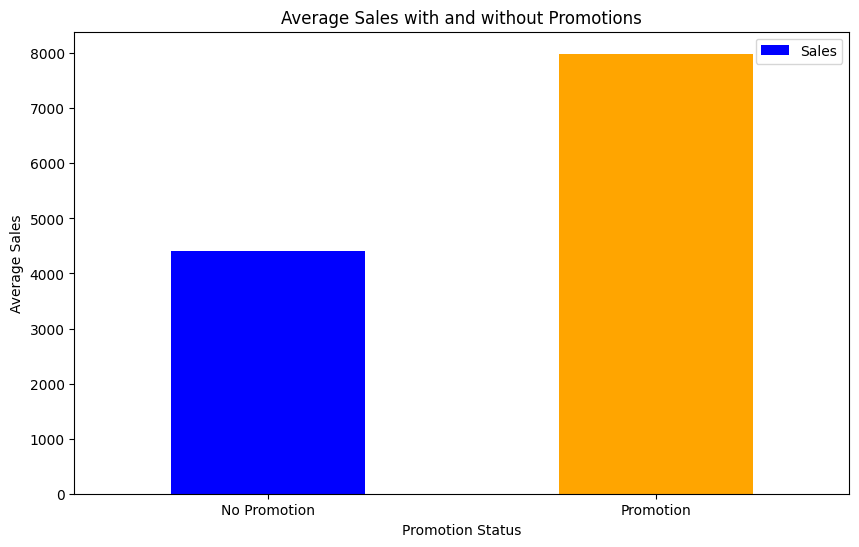

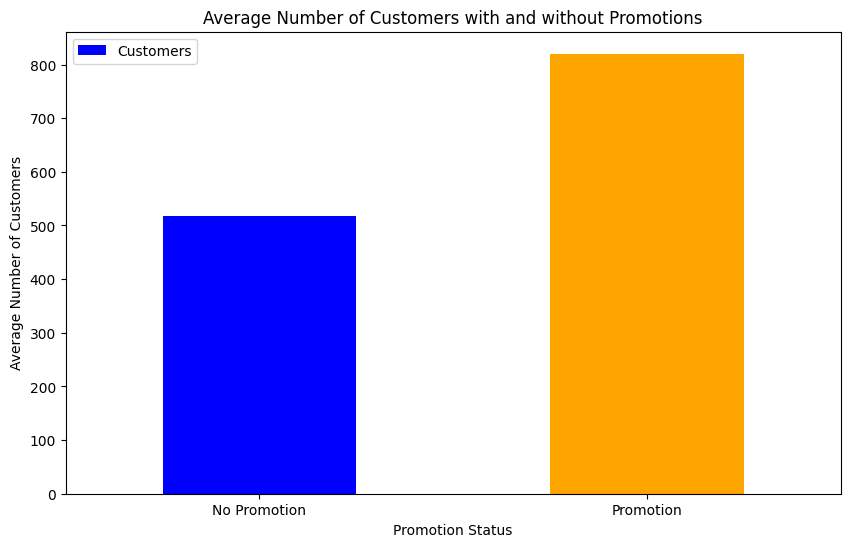

C:\Users\hp\AppData\Local\Temp\ipykernel_11188\585008823.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


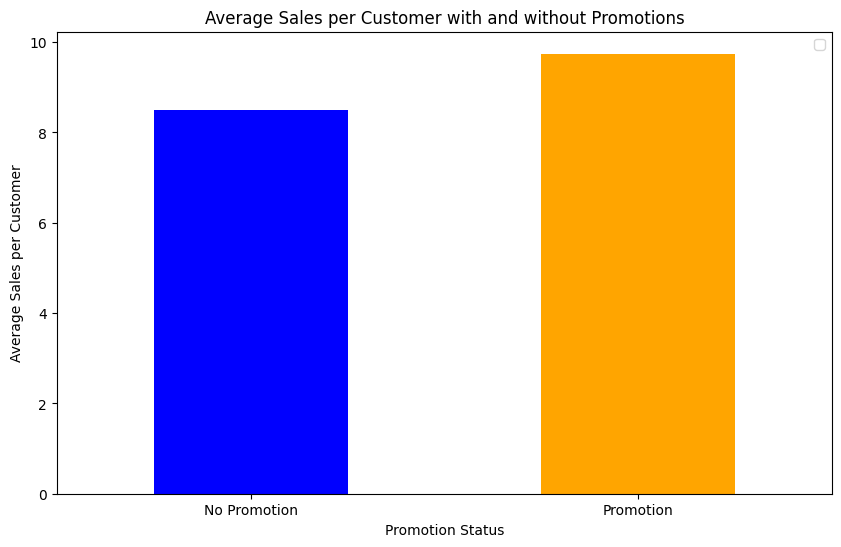

In [80]:
# Plotting average sales with and without promotions
plt.figure(figsize=(10, 6))
avg_sales.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Sales with and without Promotions')
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['No Promotion', 'Promotion'], rotation=0)
plt.legend()
plt.show()

# Plotting average number of customers with and without promotions
plt.figure(figsize=(10, 6))
avg_customers.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Number of Customers with and without Promotions')
plt.xlabel('Promotion Status')
plt.ylabel('Average Number of Customers')
plt.xticks([0, 1], ['No Promotion', 'Promotion'], rotation=0)
plt.legend()
plt.show()

# Plotting average sales per customer with and without promotions
plt.figure(figsize=(10, 6))
avg_sales_per_customer.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Sales per Customer with and without Promotions')
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales per Customer')
plt.xticks([0, 1], ['No Promotion', 'Promotion'], rotation=0)
plt.legend()
plt.show()

6. Trends of customer behavior during store opening and closing times

In [81]:
# Filter data for open hours
open_hours_data = trainData[trainData['Open'] == 1]

# Define time windows (e.g., 1 hour before and after opening/closing)
time_window = pd.Timedelta(hours=1)

# Calculate average number of customers during each time window
avg_customers_before_open = open_hours_data['Customers'].rolling(window=time_window, closed='right').mean()
avg_customers_after_close = open_hours_data['Customers'].rolling(window=time_window, closed='left').mean()


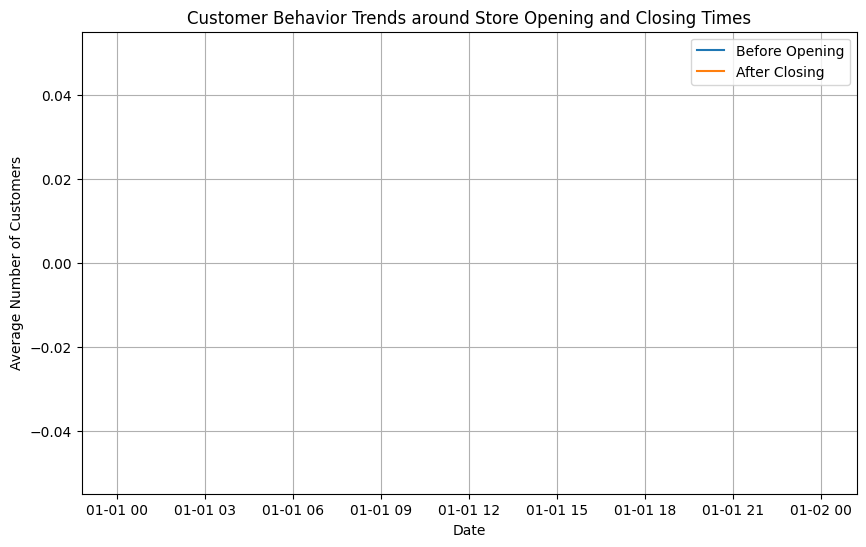

In [82]:
# Plot customer behavior trends
plt.figure(figsize=(10, 6))
plt.plot(open_hours_data['Date'], avg_customers_before_open, label='Before Opening')
plt.plot(open_hours_data['Date'], avg_customers_after_close, label='After Closing')
plt.title('Customer Behavior Trends around Store Opening and Closing Times')
plt.xlabel('Date')
plt.ylabel('Average Number of Customers')
plt.legend()
plt.grid(True)
plt.show()

7. Which stores are open on all weekdays? How does that affect their sales on weekends?

In [83]:
# Group the data by store and count the number of unique weekdays each store is open
store_open_weekdays = trainData[trainData['DayOfWeek'].isin([1, 2, 3, 4, 5])].groupby('Store')['DayOfWeek'].nunique()

# Filter stores that are open on all weekdays
stores_open_all_weekdays = store_open_weekdays[store_open_weekdays == 5].index.tolist()

# Filter data for stores open on all weekdays and weekends
stores_data = trainData[trainData['Store'].isin(stores_open_all_weekdays)]

# Calculate the average sales for each store on weekends
weekend_sales = stores_data[stores_data['DayOfWeek'].isin([6, 7])].groupby('Store')['Sales'].mean()

# Calculate the average sales for each store on weekdays
weekday_sales = stores_data[~stores_data['DayOfWeek'].isin([6, 7])].groupby('Store')['Sales'].mean()


C:\Users\hp\AppData\Local\Temp\ipykernel_11188\3815445162.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([weekday_sales, weekend_sales], labels=['Weekdays', 'Weekends'])


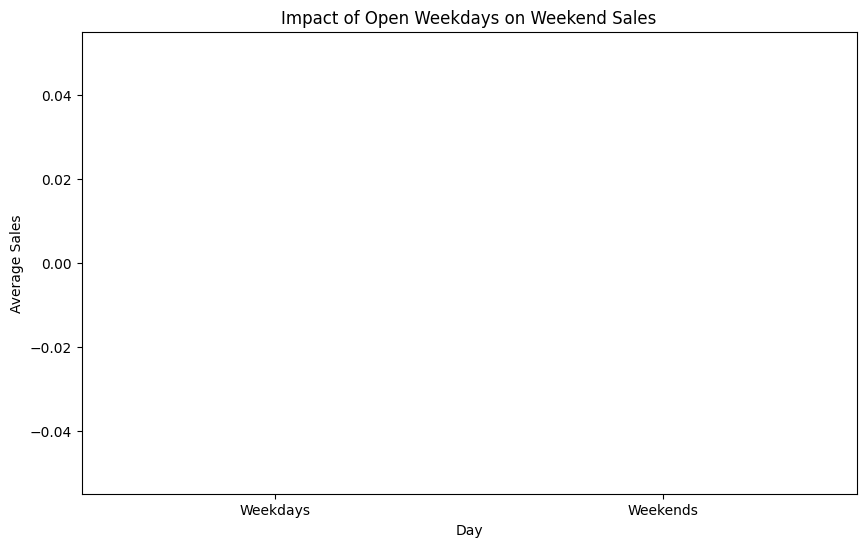

In [85]:
# Visualize the impact on sales
plt.figure(figsize=(10, 6))
plt.boxplot([weekday_sales, weekend_sales], labels=['Weekdays', 'Weekends'])
plt.title('Impact of Open Weekdays on Weekend Sales')
plt.xlabel('Day')
plt.ylabel('Average Sales')
plt.show()

9. Check how the assortment type affects sales


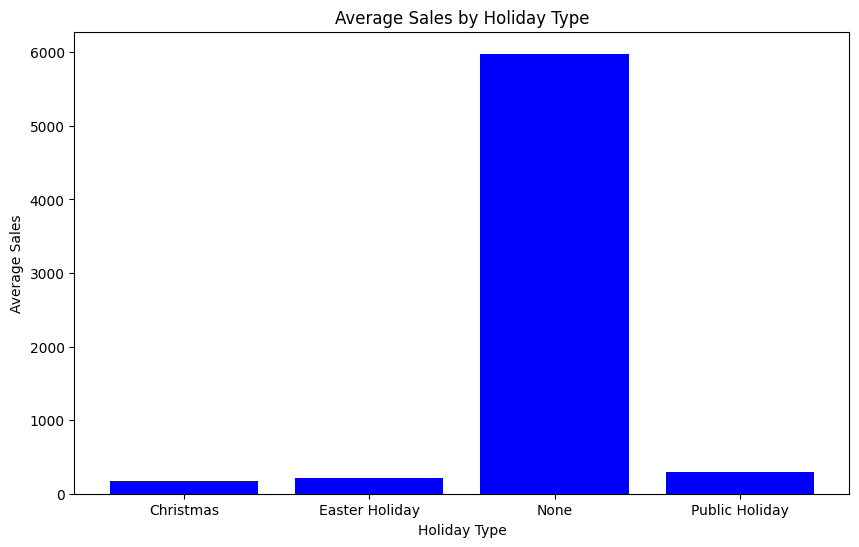

In [90]:
holiday_sales = trainData.groupby('HolidayType')['Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(holiday_sales['HolidayType'], holiday_sales['Sales'], color='blue')
plt.title('Average Sales by Holiday Type')
plt.xlabel('Holiday Type')
plt.ylabel('Average Sales')
plt.show()

10.  Analyze how the day of the week affects sales

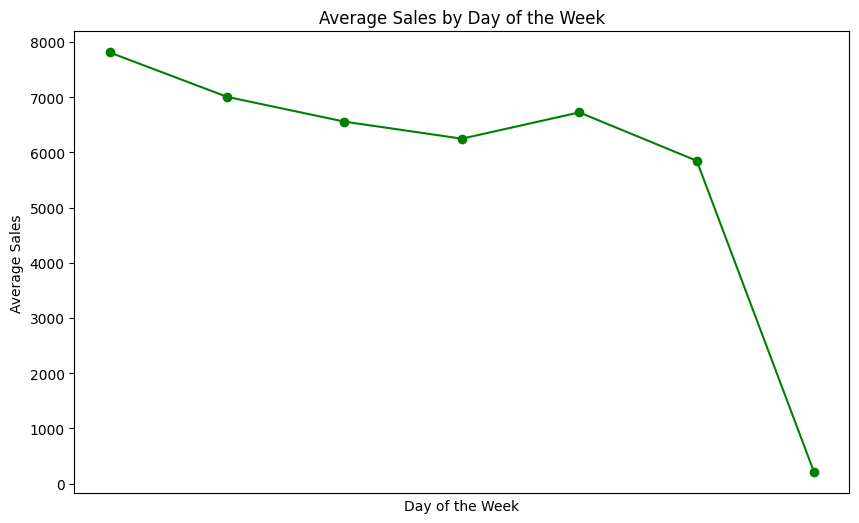

In [91]:
# Analyze how the day of the week affects sales
dayofweek_sales = trainData.groupby('DayOfWeek')['Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(dayofweek_sales['DayOfWeek'], dayofweek_sales['Sales'], marker='o', linestyle='-', color='green')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.show()

11. Analyze the impact of promotions on sales

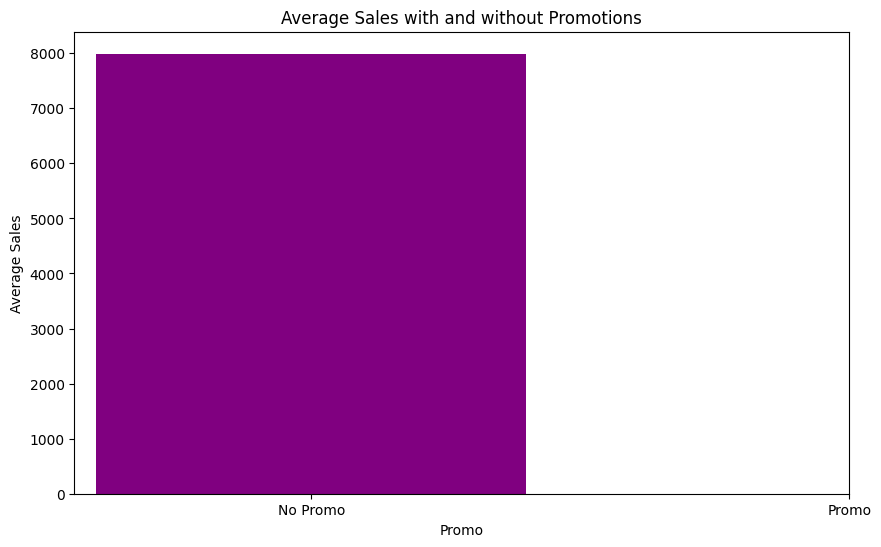

In [92]:
promo_sales = trainData.groupby('Promo')['Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(promo_sales['Promo'], promo_sales['Sales'], color='purple')
plt.title('Average Sales with and without Promotions')
plt.xlabel('Promo')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.show()